# K Nearest Neighbors

K Nearest Neighbors (KNN) is an algorithm for classifcation and regression problems. It stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K-NN algorithm.

Implementing the KNN algorithm:

We have a dataset that contains description of flags that will predict the religion of that flag's country. We have image of different flags that looks similar to the dataset flags. Our KNN model will find the similar features of the new data set to fit the flags description and based on the similar features it will put it into a religion: Catholic, Hindu, Muslim and other Christianity.  

Steps to implement the K-NN algorithm:
-Data pre-processing step
-Fitting the K-NN algorithm to the Training set
-Predicting the test result
-Test accuracy of the result
-Visualizing the test set result

In [187]:
#Imports
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [188]:
#Loading Dataset
flag = pd.read_csv("flags_with_headers_v_5.csv")
flag.head(20)

,Unnamed: 0,name,landmass,zone,area,population,language,religion,bars,stripes,...,sunstars,crescent,triangle,icon,animate,text,topleft,botright,area_sq_miles,pop_density
0,0,Afghanistan,5,1,648.000,16.000000,10,1,0,3,...,1,0,0,1,0,0,black,green,250193.1,63.95
1,1,Albania,3,1,29.000,3.000000,6,1,0,0,...,1,0,0,0,1,0,red,red,11196.9,267.93
2,2,Algeria,4,1,2388.000,20.000000,8,1,2,0,...,1,1,0,0,0,0,green,white,922007.7,21.69
3,3,American_Samoa,6,3,0.200,0.032646,1,0,0,0,...,0,0,1,1,1,0,blue,red,77.2,422.88
4,4,Andorra,3,1,0.495,0.041600,6,0,3,0,...,0,0,0,0,0,0,blue,red,191.1,217.69
5,5,Angola,4,2,1247.000,7.000000,10,4,0,2,...,1,0,0,1,0,0,red,black,481467.2,14.54
6,6,Anguilla,1,4,0.091,0.007000,1,0,0,1,...,0,0,0,0,1,0,white,blue,35.1,199.43
7,7,Antigua_Barbuda,1,4,0.280,0.078000,1,0,0,1,...,1,0,1,0,0,0,black,red,108.1,721.55
8,8,Argentina,2,3,2777.000,28.000000,2,0,0,3,...,0,0,0,0,0,0,blue,blue,1072200.8,26.11
9,9,Australia,6,2,7690.000,15.000000,1,0,0,0,...,6,0,0,0,0,0,white,blue,2969112.0,5.05


In [189]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     193 non-null    int64  
 1   name           193 non-null    object 
 2   landmass       193 non-null    int64  
 3   zone           193 non-null    int64  
 4   area           193 non-null    float64
 5   population     193 non-null    float64
 6   language       193 non-null    int64  
 7   religion       193 non-null    int64  
 8   bars           193 non-null    int64  
 9   stripes        193 non-null    int64  
 10  colors         193 non-null    int64  
 11  red            193 non-null    int64  
 12  green          193 non-null    int64  
 13  blue           193 non-null    int64  
 14  gold           193 non-null    int64  
 15  white          193 non-null    int64  
 16  black          193 non-null    int64  
 17  orange         193 non-null    int64  
 18  mainhue   

In [190]:
flag = pd.get_dummies(flag)
flag

,Unnamed: 0,landmass,zone,area,population,language,religion,bars,stripes,colors,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,0,5,1,648.000,16.000000,10,1,0,3,5,...,0,0,0,0,0,0,1,0,0,0
1,1,3,1,29.000,3.000000,6,1,0,0,3,...,1,0,0,0,0,0,0,0,1,0
2,2,4,1,2388.000,20.000000,8,1,2,0,3,...,0,0,0,0,0,0,0,0,0,1
3,3,6,3,0.200,0.032646,1,0,0,0,5,...,0,0,0,0,0,0,0,0,1,0
4,4,3,1,0.495,0.041600,6,0,3,0,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,188,6,3,2.850,0.158130,1,0,0,0,3,...,0,0,0,0,0,0,0,0,1,0
189,189,3,1,256.000,22.000000,6,0,0,3,4,...,0,0,0,0,0,0,0,0,1,0
190,190,4,2,905.000,28.000000,10,4,0,0,4,...,0,0,0,0,0,0,1,0,0,0
191,191,4,2,753.000,6.000000,10,4,3,0,4,...,0,0,0,0,1,0,0,0,0,0


In [191]:
X = flag.drop(columns=['religion', 'Unnamed: 0'], axis=1)
y = flag.religion

Drop the 'output: religion' from the input set since that will become our y values, dependent 

# Scaling the data

In [192]:
#Splitting the training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [193]:
#Create a StandardScaler model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [194]:
#Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

We are trying to measure distance from each flag data set and by utilizing the StandardScaler model we can assure our data set fit since they contain several differenct sizes.

# Test K Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.510
k: 3, Train/Test Score: 0.729/0.673
k: 5, Train/Test Score: 0.667/0.694
k: 7, Train/Test Score: 0.694/0.735
k: 9, Train/Test Score: 0.646/0.735
k: 11, Train/Test Score: 0.646/0.755
k: 13, Train/Test Score: 0.646/0.755
k: 15, Train/Test Score: 0.611/0.776
k: 17, Train/Test Score: 0.653/0.755
k: 19, Train/Test Score: 0.646/0.755


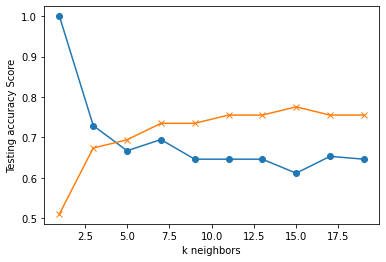

In [195]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Blue: Train score 
Yellow: Test score

We look for a spot where the line stablizes, and use that K.

In [196]:
#Note that k: 7 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.735


# Predication

In [197]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [198]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 1, 0, 0, 4, 2, 2, 2, 1, 0, 4, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

Anaylsis: Per the KNN model, we have a 70% of classifying flag colors, shapes, images, and text to predict the country's religion.